In [1]:
from numpy import *
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def standRegress(xArr,yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular,cannot do inverse!!!")
        return 
    ws = xTx.I * (xMat.T*yMat)
    return ws
        

In [3]:
xArr,yArr = loadDataSet('./data/ex0.txt')
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [4]:
ws = standRegress(xArr,yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

In [5]:
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat*ws

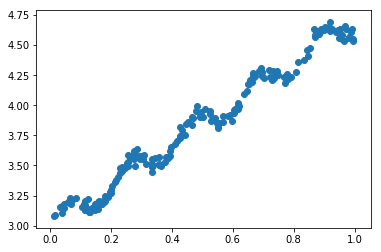

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])

In [7]:
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws
ax.plot(xCopy[:,1],yHat)

In [8]:
plt.show()

In [9]:
mpl.matplotlib_fname()

'/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [10]:
# 查询后台用的什么？
mpl.get_backend()  

'module://ipykernel.pylab.backend_inline'

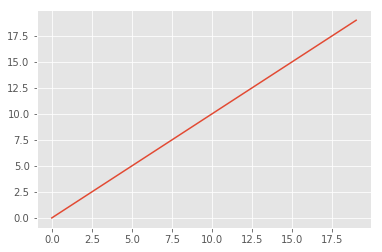

In [11]:
plt.plot(range(20),range(20))

In [12]:
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m)))
    for j in range(m):                      #next 2 lines create weights matrix
        diffMat = testPoint - xMat[j,:]     #
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse!!!")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws
                  
                  

                  
def lwlrTest(testArr,xArr,yArr,k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat
        

In [13]:
xArr,yArr = loadDataSet('./data/ex0.txt')

In [14]:
yArr[0]

3.176513

In [15]:
xArr[0]

[1.0, 0.067732]

In [16]:
lwlr(xArr[0],xArr,yArr,1.0)

matrix([[3.12204471]])

In [17]:
lwlr(xArr[0],xArr,yArr,0.001)

matrix([[3.20175729]])

In [18]:
yHat = lwlrTest(xArr,xArr,yArr,0.1)
yHat

array([3.14971201, 3.72900133, 4.63630691, 4.27070271, 4.62994241,
       3.89713164, 3.64442421, 3.12383051, 3.22569271, 3.23375663,
       3.42112184, 4.11106283, 4.25831517, 3.40164087, 4.62288421,
       4.03764101, 3.60989382, 3.2482244 , 4.09215715, 3.39011695,
       3.1519663 , 3.1491991 , 4.57864059, 4.23482271, 3.11264708,
       3.57019624, 3.12828104, 3.35829978, 4.05502756, 3.92258965,
       3.13172356, 3.21714437, 3.94864482, 4.54505554, 4.61398242,
       3.46786051, 3.67110151, 4.50046919, 3.69798483, 4.5563555 ,
       3.27871494, 4.14130617, 3.44907333, 3.39162048, 3.94256339,
       3.13347204, 3.62198828, 3.84438747, 3.8417812 , 4.36387999,
       4.32501649, 3.42820363, 3.30433993, 4.39167433, 3.56859482,
       3.57617521, 3.7718675 , 4.19445457, 4.00828198, 3.52463471,
       3.24902781, 4.20753829, 4.24147777, 4.14467275, 3.21460531,
       4.05694353, 3.64819444, 3.6560211 , 4.33803495, 3.20273091,
       3.20194621, 4.13859291, 3.43359422, 4.6356797 , 3.50353

In [19]:
xMat = mat(xArr)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]

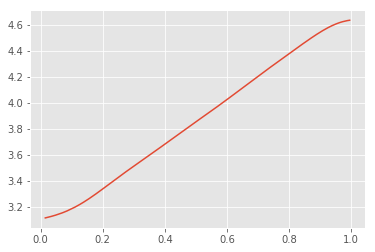

In [20]:
import matplotlib.pyplot as plt
#import pylab
#%pylab inline
%matplotlib inline
%gui
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])

In [21]:

ax.scatter(xMat[:,1].flatten().A[0],mat(yArr).T.flatten().A[0],s=2,c='red')

In [22]:
plt.show()